In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/tree.pkl")
model_rand = load_pickle_zip("../models/models/tree_rand.pkl")
res_ex = load_pickle_zip("../models/solutions/tree.pkl")
res_ex_rand = load_pickle_zip("../models/solutions/tree_rand.pkl")

In [4]:
betas = res_ex["betas"]

In [5]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693156.241 std_fe: 4.66E+02 M: 0.007 S: 0.693 E: -0.001 M: 0.0289, B1 = 0.00302
fe: -6.977 std_fe: 8.26E-04 M: 0.007 S: 0.689 E: -0.090: 0.0202, B1 = -0.000
fe: -3.557 std_fe: 4.00E-04 M: 0.008 S: 0.675 E: -0.182: 0.0335, B1 = 0.000
fe: -2.447 std_fe: 2.58E-04 M: 0.009 S: 0.653 E: -0.270: 0.0352, B1 = -0.000
fe: -1.913 std_fe: 1.45E-04 M: 0.005 S: 0.625 E: -0.350: 0.0335, B1 = 0.000
fe: -1.608 std_fe: 1.23E-04 M: 0.008 S: 0.591 E: -0.427: 0.0251, B1 = -0.000
fe: -1.417 std_fe: 1.09E-04 M: 0.009 S: 0.552 E: -0.497: 0.0246, B1 = 0.000
fe: -1.290 std_fe: 1.04E-04 M: 0.008 S: 0.513 E: -0.558: 0.0322, B1 = 0.0002
fe: -1.202 std_fe: 9.87E-05 M: 0.006 S: 0.467 E: -0.618 0.0448, B1 = -0.0000
fe: -1.139 std_fe: 9.07E-05 M: 0.008 S: 0.428 E: -0.664 0.0152, B1 = 0.00000
fe: -1.094 std_fe: 9.82E-05 M: 0.007 S: 0.389 E: -0.704 0.0234, B1 = 0.00001
fe: -1.060 std_fe: 1.05E-04 M: 0.014 S: 0.352 E: -0.740 0.022, B1 = 0.000000
fe: -1.034 std_fe: 9.25E-05 M: 0.011 S: 0.316 E: -0.771 0.018, B1 = -0.

In [6]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -693145.891 std_fe: 3.05E+02 M: 0.011 S: 0.693 E: -0.003M: 0.02, B1 = 0.18333215
fe: -6.977 std_fe: 7.85E-04 M: 0.007 S: 0.689 E: -0.089: 0.0263, B1 = -0.005
fe: -3.557 std_fe: 2.16E-04 M: 0.005 S: 0.675 E: -0.183: 0.0195, B1 = -0.002
fe: -2.447 std_fe: 1.51E-04 M: 0.008 S: 0.653 E: -0.270: 0.016, B1 = -0.010
fe: -1.913 std_fe: 9.47E-05 M: 0.006 S: 0.627 E: -0.345 0.0257, B1 = 0.0060
fe: -1.608 std_fe: 9.59E-05 M: 0.010 S: 0.591 E: -0.426 0.0278, B1 = 0.04501
fe: -1.417 std_fe: 1.05E-04 M: 0.009 S: 0.551 E: -0.498 0.0305, B1 = 0.03015
fe: -1.290 std_fe: 9.76E-05 M: 0.008 S: 0.513 E: -0.557 0.0188, B1 = 0.0557
fe: -1.202 std_fe: 1.04E-04 M: 0.009 S: 0.472 E: -0.612 0.0262, B1 = -0.1104
fe: -1.139 std_fe: 9.94E-05 M: 0.008 S: 0.433 E: -0.659 0.0274, B1 = 0.3801
fe: -1.094 std_fe: 1.03E-04 M: 0.006 S: 0.391 E: -0.703 0.0132, B1 = -0.2189
fe: -1.060 std_fe: 9.67E-05 M: 0.008 S: 0.352 E: -0.739 0.0318, B1 = 0.3022
fe: -1.034 std_fe: 9.60E-05 M: 0.006 S: 0.317 E: -0.770 0.0302, B1 = -0.2

In [7]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = False, x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -693147.422 std_fe: 3.39E-01 M: -0.005 S: 0.693 E: -0.002: 0.0148, B1 = -0.00001
fe: -6.977 std_fe: 1.00E-06 M: 0.011 S: 0.689 E: -0.090: 0.0271, B1 = -0.000
fe: -3.557 std_fe: 4.69E-07 M: -0.014 S: 0.675 E: -0.181 0.0285, B1 = -0.000
fe: -2.447 std_fe: 2.32E-07 M: 0.004 S: 0.652 E: -0.275: 0.03, B1 = 0.00000
fe: -1.913 std_fe: 1.69E-07 M: -0.054 S: 0.626 E: -0.349 0.0186, B1 = 0.0002
fe: -1.608 std_fe: 1.31E-07 M: -0.069 S: 0.590 E: -0.429 0.0214, B1 = 0.000
fe: -1.417 std_fe: 1.02E-07 M: -0.087 S: 0.552 E: -0.4970.02, B1 = -0.000001
fe: -1.290 std_fe: 1.03E-07 M: -0.123 S: 0.513 E: -0.5560.0172, B1 = -0.0000
fe: -1.202 std_fe: 1.19E-07 M: 0.042 S: 0.469 E: -0.615 0.0772, B1 = -0.0001
fe: -1.139 std_fe: 1.24E-07 M: -0.006 S: 0.432 E: -0.6590.0206, B1 = 0.00000
fe: -1.094 std_fe: 1.39E-07 M: 0.079 S: 0.392 E: -0.702 0.0272, B1 = -0.0011
fe: -1.060 std_fe: 1.39E-07 M: -0.049 S: 0.351 E: -0.7400.0197, B1 = 0.00000
fe: -1.034 std_fe: 1.56E-07 M: 0.020 S: 0.318 E: -0.770 0.0126, B1 = 0

In [8]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.977, ener: -0.092, M: 0.000, iter 4
fe: -3.557, ener: -0.182, M: 0.000, iter 4
fe: -2.447, ener: -0.269, M: 0.000, iter 4
fe: -1.913, ener: -0.351, M: 0.000, iter 4
fe: -1.608, ener: -0.427, M: 0.000, iter 4
fe: -1.417, ener: -0.496, M: 0.000, iter 4
fe: -1.290, ener: -0.558, M: 0.000, iter 4
fe: -1.202, ener: -0.613, M: 0.000, iter 4
fe: -1.139, ener: -0.661, M: 0.000, iter 4
fe: -1.094, ener: -0.703, M: 0.000, iter 4
fe: -1.060, ener: -0.739, M: 0.000, iter 4
fe: -1.034, ener: -0.770, M: 0.000, iter 4
fe: -1.015, ener: -0.795, M: 0.000, iter 4
fe: -1.000, ener: -0.817, M: 0.000, iter 4
fe: -0.989, ener: -0.836, M: 0.000, iter 4
fe: -0.979, ener: -0.851, M: 0.000, iter 4
fe: -0.972, ener: -0.863, M: 0.000, iter 4
fe: -0.967, ener: -0.874, M: 0.000, iter 4
fe: -0.962, ener: -0.883, M: 0.000, iter 4


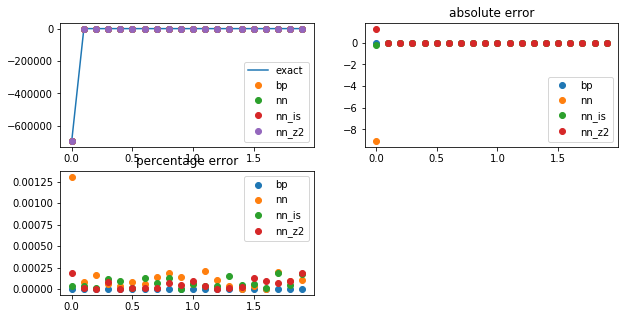

In [9]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is, res_nn_z2], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

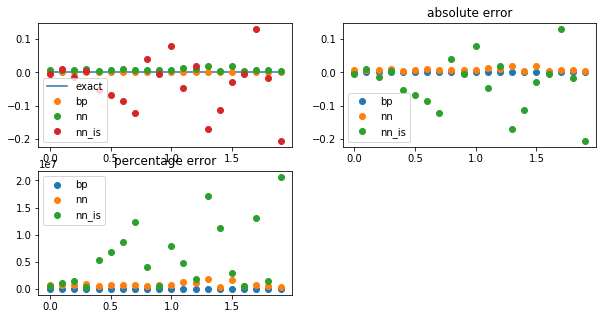

In [10]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

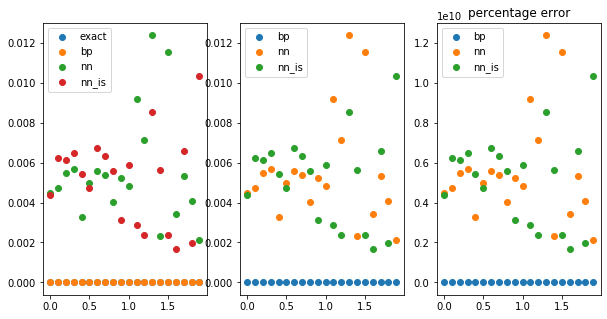

In [11]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

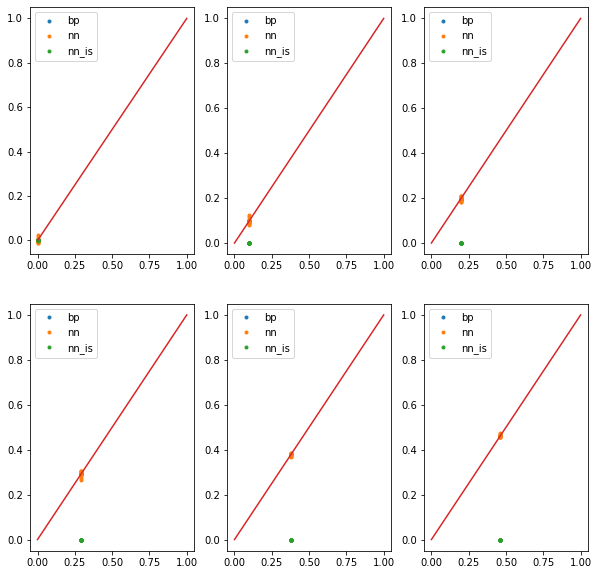

In [12]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()